In [2]:
import pandas as pd
import numpy as np
from decimal import *
import math
import matplotlib.pyplot as plt

In [3]:
# Функция чтения и сохранения в список даты и времени из читаемого файла
def GetDateAndTime(filename):
    # Открытие и чтение файла в переменную text
    with open(filename, encoding='utf-8') as f:
        text = f.readlines()
        
    # Ключевая строка, по которой находим дату и время в файле
    TimeKeyWord = "Timepoint:"

    # Список-буффер используемый для форматирования списка DateAndTime
    timebuff = []

    i = 0 # Итератор
    # Если встречается ключевое слово "Timepoint:" - сохраняем строку в переменную timebuff
    for i in range(len(text) - 1):
        if TimeKeyWord in text[i]:
            timebuff.append(text[i])

    # Инициализация списка даты и времени DateAndTime
    DateAndTime = []

    j = 0 # Итератор
    
    # Форматируем полученные значения даты/времени и сохраняем их в список DateAndTime
    for j in range(len(timebuff)):
        buff = timebuff[j]
        buff = buff.replace('\n', '')
        buff = buff.split(" ")
        buff = buff[-2:]
        DateAndTime.append(buff[0])
    
    return DateAndTime

In [4]:
# Функция чтения и сохранения в список соотношений расчетной температуры к измеренной из читаемого файла
def GetNkni(filename):
    # Открытие и чтение файла в переменную text
    with open(filename, encoding='utf-8') as f:
        text = f.readlines()
    
    # Инициализация списка соотношений расчетной температуры к измеренной
    Nkni_Pos = []
    
    # Ключевая строка, по которой находим соотношения расчетной температуры к измеренной в файле
    NkniKeyWord = "# NTvs$pos_name"
    
    i = 0 # Итератор
    j = 0 # Итератор
    
    # Форматируем полученные значения и сохраняем их в список Nkni_Pos
    for i in range(len(text) - 1):
        if NkniKeyWord in text[i]:
            for j in range(163):
                buff = text[i+j+1]
                buff = buff.replace('\n', '')
                buff = buff.split("\t")
                Nkni_Pos.append(buff)
                
    return Nkni_Pos

In [5]:
# Функция чтения и сохранения в список мощностей из читаемого файла
def GetNakz(filename):
    # Открытие и чтение файла в переменную text
    with open(filename, encoding='utf-8') as f:
        text = f.readlines()
    
    # Инициализация списка мощностей Nakz
    Nakz = []
    
    # Ключевая строка, по которой находим значения мощностей в файле
    NakzKeyWord = "# Param: Nakz"
    
    i = 0 # Итератор
    
    # Форматируем полученные значения и сохраняем их в список Nakz
    for i in range(len(text) - 1):
        if NakzKeyWord in text[i]:
                buff = text[i+1]
                buff = buff.replace('\n', '')
                buff = buff.split("\t")
                buff = round(float(buff[2]), 2)
                Nakz.append(buff)
                
    return Nakz

In [6]:
# Функция чтения и сохранения в список температур из читаемого файла
def GetTemperatures(filename):
    # Открытие и чтение файла в переменную text
    with open(filename, encoding='utf-8') as f:
        text = f.readlines()
    
    # Ключевая строка, по которой находим значения температур в файле
    TemperatureKeyWord = "Param:"

    # Инициализация списка, используемого для хранения значений температур и их индексов соответственно
    Temperatures = []
    index = []

    i = 0 # Итератор
    k = -1 # Итератор
    j = 1 # Итератор

    # Переменная, с помощью которой определяется, находится ли в прочитанной
    # строке значение температур
    check = False

    # Форматируем полученные значения температур и сохраняем их в список Temperatures
    for i in range(len(text)):
        if TemperatureKeyWord in text[i]:
            Temperatures.append([])
            index.append([])
            check = True
            k = k + 1
            continue

        if check == True:
            if text[i] == '\n' or TemperatureKeyWord in text[i]:
                check = False
                continue

            
            buff = text[i]
            buff = buff.replace('\n', '')
            buff = buff.replace('\t', ' ')
            buff = buff.split()
            
            # Проверка на пропущенные значения в файле по индексам данных
            if buff[0] != str(j) and (filename == 'TPkni_out_A.txt' or filename == 'TPkni_out_B.txt'):
                Temperatures[k].append(float(0))
                index[k].append(j)
                j = j + 1
                       
            j = j + 1
            
            Temperatures[k].append(float(buff[2]))
            index[k].append(buff[0])
            
            if j == 54 and (filename == 'TPkni_out_A.txt' or filename == 'TPkni_out_B.txt'):
                Temperatures[k].append(float(0))
                index[k].append(j)
                j = 1
    
    return Temperatures, index

In [7]:
# Функция создания датафрейма
def GetDF(ListDateAndTime, ListTemperatures):
    
    # Сохраняем списки температур и даты/времени в датафрейм
    TemperaturesDF = pd.DataFrame(ListTemperatures,ListDateAndTime)
    return TemperaturesDF

In [8]:
# Функция создания и форматирования графика
def GetDecorGraf(graf, y_lim_graf, title_name, xlabel_name, ylabel_name, IsItNakz):
    
    fig, ax = plt.subplots(figsize=(10,5))

    if IsItNakz == True:
        plt.plot(graf, 'm')
    else:
        plt.plot(graf)
        
    graf = graf.transpose()
    Dates = graf.columns
    graf = graf.transpose()
    
    plt.ylim(y_lim_graf)
    
    plt.xlabel('Ось x', fontsize=10, color='blue')
    plt.ylabel('Ось y', fontsize=10, color='blue')

    #Добавляем линии основной сетки:
    ax.grid(which='major', color = 'k')
    #Включаем видимость вспомогательных делений:
    ax.minorticks_on()
    #  Теперь можем отдельно задавать внешний вид вспомогательной сетки:
    ax.grid(which='minor', color = 'gray', linestyle = ':')

    #Количество рисок с подписями дат
    xlabels = 20
    LenDateAndTime = len(Dates)
    x_ticks = []
    intbuff = round((LenDateAndTime - 1)/(xlabels - 1))

    i = 0 # Итератор
    for i in range(xlabels):
        x_ticks.append(i * intbuff/2)

    # Инициализация списка, используемого для хранения дат соответствующих значениям x_ticks
    XlabelsList = []

    i = 0 # Итератор
    for i in range(xlabels):
        XlabelsList.append(Dates[i * intbuff])

    plt.xticks(ticks=x_ticks, labels=XlabelsList, rotation=90)
    
    ax.set_title(title_name)
    ax.set_xlabel(xlabel_name)
    ax.set_ylabel(ylabel_name)

In [9]:
# Функция, реализующая разницу температур 
def GetGraphDif(file_name_Tout, file_name_Tpkni, y_lim_top, y_lim_bottom):

    Date = GetDateAndTime(file_name_Tout)
    Temperature, Temp_Id = GetTemperatures(file_name_Tout)
    TempDF = GetDF(Date, Temperature)

    Date_TPkni = GetDateAndTime(file_name_Tpkni)
    Temperature_TPkni, Temp_Id_TPkni = GetTemperatures(file_name_Tpkni)
    TempDF_TPkni = GetDF(Date_TPkni, Temperature_TPkni)
    
    i = 0 # Итератор
    k = 0 # Итератор

    # Инициализация списка разницы температурр
    TemperatureDifference = []

    Nkni = GetNkni('KK_Nkni.txt')

    for k in range(len(Temperature_TPkni)):
        TemperatureDifference.append([])
        for i in range(len(Nkni)):
            if int(Nkni[i][1]) > 0:
                Dif = Temperature[k][i] - Temperature_TPkni[k][int(Nkni[i][1]) - 1]
                # Если разница больше или меньше определенных значений,
                # то это выброс и мы его не рассматриваем
                if Dif > y_lim_top or Dif < y_lim_bottom:
                    Dif = float(0)
                    Dif = np.nan
                TemperatureDifference[k].append(round(Dif, 2))
            else:
                Dif = np.nan
                TemperatureDifference[k].append(round(Dif, 2))

    DifDF = GetDF(GetDateAndTime(filenameTPkni_out_A), TemperatureDifference)
    
    return DifDF
    

In [10]:
# Функция, реализующая вывод графиков мощности и разницы температур на одном полотне
def NakzAndDef(filenameTPkni_out):
    
    filenameTout = 'Tout.txt'
        
    #=======================================#
    # Вывод графика мощностей на экран
    fig, ax = plt.subplots(figsize=(15,10))

    sp = plt.subplot(3, 1, 1)

    Сapacity_Nakz = GetNakz('Nakz.txt')
    NakzDF = GetDF(GetDateAndTime(filenameTout), Сapacity_Nakz)

    plt.plot(NakzDF, 'm')

    plt.grid(which='major', color = 'k')
    plt.minorticks_on()
    plt.grid(which='minor', color = 'gray', linestyle = ':')


    name_title = 'График мощности работы блока'
    name_xlabel = 'Дата измерения мощности'
    name_ylabel = 'Значение мощности'

    plt.title(name_title)
    plt.xlabel(name_xlabel)
    plt.ylabel(name_ylabel)


    #Количество рисок с подписями дат
    xlabels = 20
    LenDateAndTime = len(GetDateAndTime(filenameTout))
    x_ticks = []
    intbuff = round((LenDateAndTime - 1)/(xlabels - 1))

    i = 0 # Итератор
    for i in range(xlabels):
        x_ticks.append(i * intbuff/2)

    # Инициализация списка, используемого для хранения дат соответствующих значениям x_ticks
    XlabelsList = []

    i = 0 # Итератор
    for i in range(xlabels):
        XlabelsList.append(GetDateAndTime(filenameTout)[i * intbuff])

    plt.xticks(ticks=x_ticks, labels=XlabelsList, rotation=90)

    #=======================================#
    # Вывод графика разности температур на экран
    
    if filenameTPkni_out == 'TPkni_out_A.txt':
        # Ограничение графика по оси Y сверху и снизу соответственно
        top_y_lim = 9
        bottom_y_lim = 0

        # Ограничение максимального значения области для графиков по оси Y
        graf_lim_y = [-4, 12]
    
    if filenameTPkni_out == 'TPkni_out_B.txt':
        # Ограничение графика по оси Y сверху и снизу соответственно
        top_y_lim = 6
        bottom_y_lim = -6

        # Ограничение максимального значения области для графиков по оси Y
        graf_lim_y = [-8, 8]

    sp = plt.subplot(2, 1, 2)

    Dif_Tout_TPkni_out_A = GetGraphDif(filenameTout, filenameTPkni_out, top_y_lim, bottom_y_lim)

    plt.plot(Dif_Tout_TPkni_out_A)

    plt.ylim(graf_lim_y)

    plt.xlabel('Ось x', fontsize=10, color='blue')
    plt.ylabel('Ось y', fontsize=10, color='blue')

    #Количество рисок с подписями дат
    xlabels = 20
    LenDateAndTime = len(GetDateAndTime(filenameTout))
    x_ticks = []
    intbuff = round((LenDateAndTime - 1)/(xlabels - 1))

    i = 0 # Итератор
    for i in range(xlabels):
        x_ticks.append(i * intbuff/2)

    # Инициализация списка, используемого для хранения дат соответствующих значениям x_ticks
    XlabelsList = []

    i = 0 # Итератор
    for i in range(xlabels):
        XlabelsList.append(GetDateAndTime(filenameTout)[i * intbuff])

    plt.xticks(ticks=x_ticks, labels=XlabelsList, rotation=90)

    plt.grid(which='major', color = 'k')
    plt.minorticks_on()
    plt.grid(which='minor', color = 'gray', linestyle = ':')

    if filenameTPkni_out == 'TPkni_out_A.txt':
        name_title = 'График разности расчетных и измеренных температур Tout и TPkni_out_A соответственно'
        
    if filenameTPkni_out == 'TPkni_out_B.txt':
        name_title = 'График разности расчетных и измеренных температур Tout и TPkni_out_B соответственно'
        
    name_xlabel = 'Дата измерения/расчета температуры'
    name_ylabel = 'Значение разности температур'

    plt.title(name_title)
    plt.xlabel(name_xlabel)
    plt.ylabel(name_ylabel)
    #=======================================#


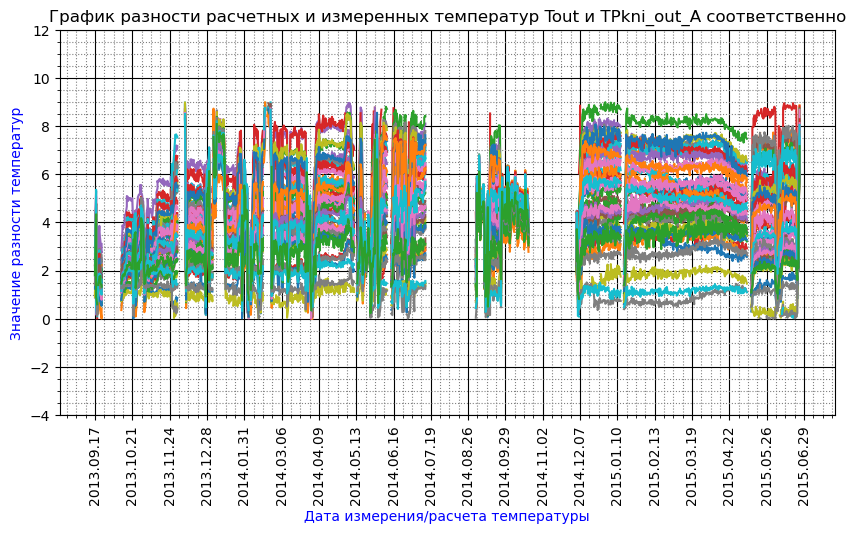

In [11]:
# Названия графика, оси X и оси Y соответственно
name_title = 'График разности расчетных и измеренных температур Tout и TPkni_out_A соответственно'
name_xlabel = 'Дата измерения/расчета температуры'
name_ylabel = 'Значение разности температур'

# Ограничение графика по оси Y сверху и снизу соответственно
top_y_lim = 9
bottom_y_lim = 0

# Ограничение максимального значения области для графиков по оси Y
graf_lim_y = [-4, 12]

# Названия читаемых файлов, используемых в функции GetGraphDif
filenameTout = 'Tout.txt'
filenameTPkni_out_A = 'TPkni_out_A.txt'

# Вызов функции разности температур
Dif_Tout_TPkni_out_A = GetGraphDif(filenameTout, filenameTPkni_out_A, top_y_lim, bottom_y_lim)

# Вызов функции создания и форматирования графика
GetDecorGraf(Dif_Tout_TPkni_out_A, graf_lim_y, name_title, name_xlabel, name_ylabel, False)

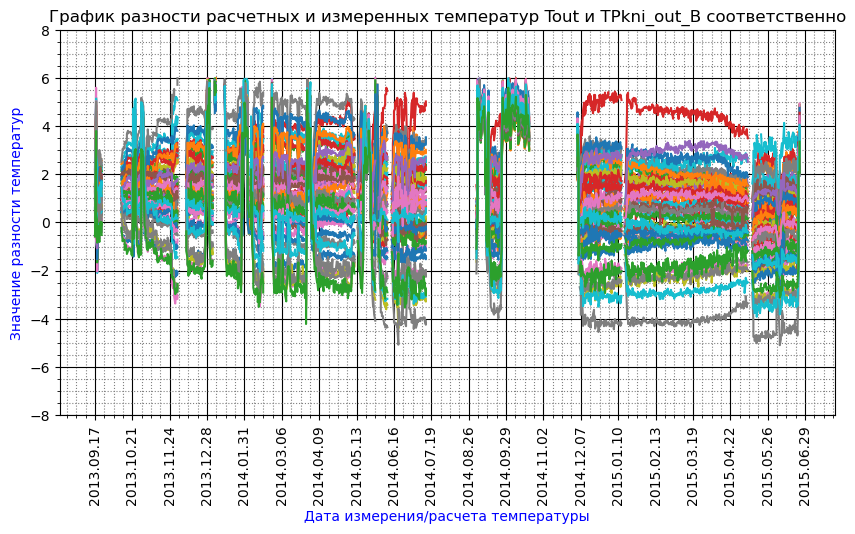

In [12]:
# Названия графика, оси X и оси Y соответственно
name_title = 'График разности расчетных и измеренных температур Tout и TPkni_out_B соответственно'
name_xlabel = 'Дата измерения/расчета температуры'
name_ylabel = 'Значение разности температур'

# Ограничение графика по оси Y сверху и снизу соответственно
top_y_lim = 6
bottom_y_lim = -6

# Ограничение максимального значения области для графиков по оси Y
graf_lim_y = [-8, 8]

# Названия читаемых файлов, используемых в функции GetGraphDif
filenameTout = 'Tout.txt'
filenameTPkni_out_B = 'TPkni_out_B.txt'

# Вызов функции разности температур
Dif_Tout_TPkni_out_B = GetGraphDif(filenameTout, filenameTPkni_out_B, top_y_lim, bottom_y_lim)

# Вызов функции создания и форматирования графика 
GetDecorGraf(Dif_Tout_TPkni_out_B, graf_lim_y, name_title, name_xlabel, name_ylabel, False)

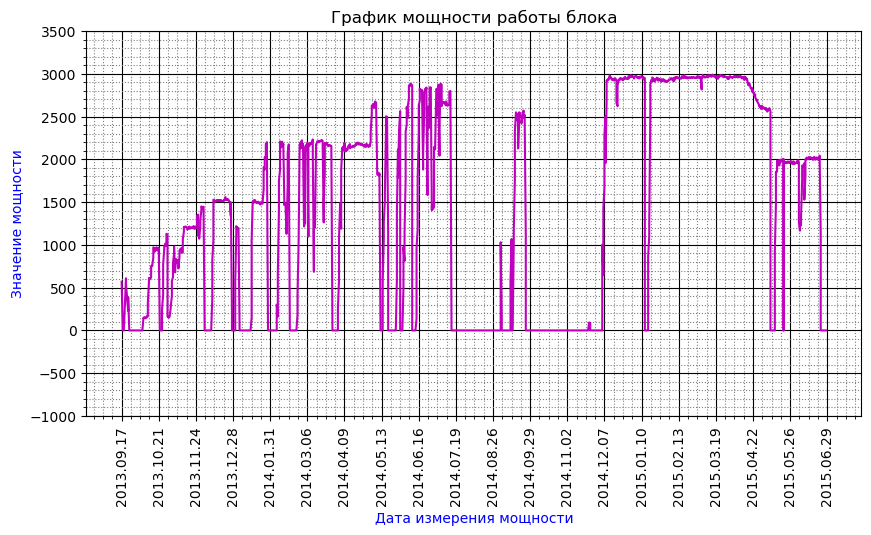

In [13]:
# Названия графика, оси X и оси Y соответственно
#name_title = 'График мощности работы блока'
name_title = 'График мощности работы блока'
name_xlabel = 'Дата измерения мощности'
name_ylabel = 'Значение мощности'

# Ограничение максимального значения области для графиков по оси Y
graf_lim_y = [-1000, 3500]

# Получение данных из файла мощностей и создание датафрейма даты и мощности
Сapacity_Nakz = GetNakz('Nakz.txt')
NakzDF = GetDF(GetDateAndTime(filenameTout), Сapacity_Nakz)

filenameTout = 'Tout.txt'
# Вызов функции создания и форматирования графика 
GetDecorGraf(NakzDF, graf_lim_y, name_title, name_xlabel, name_ylabel, True)

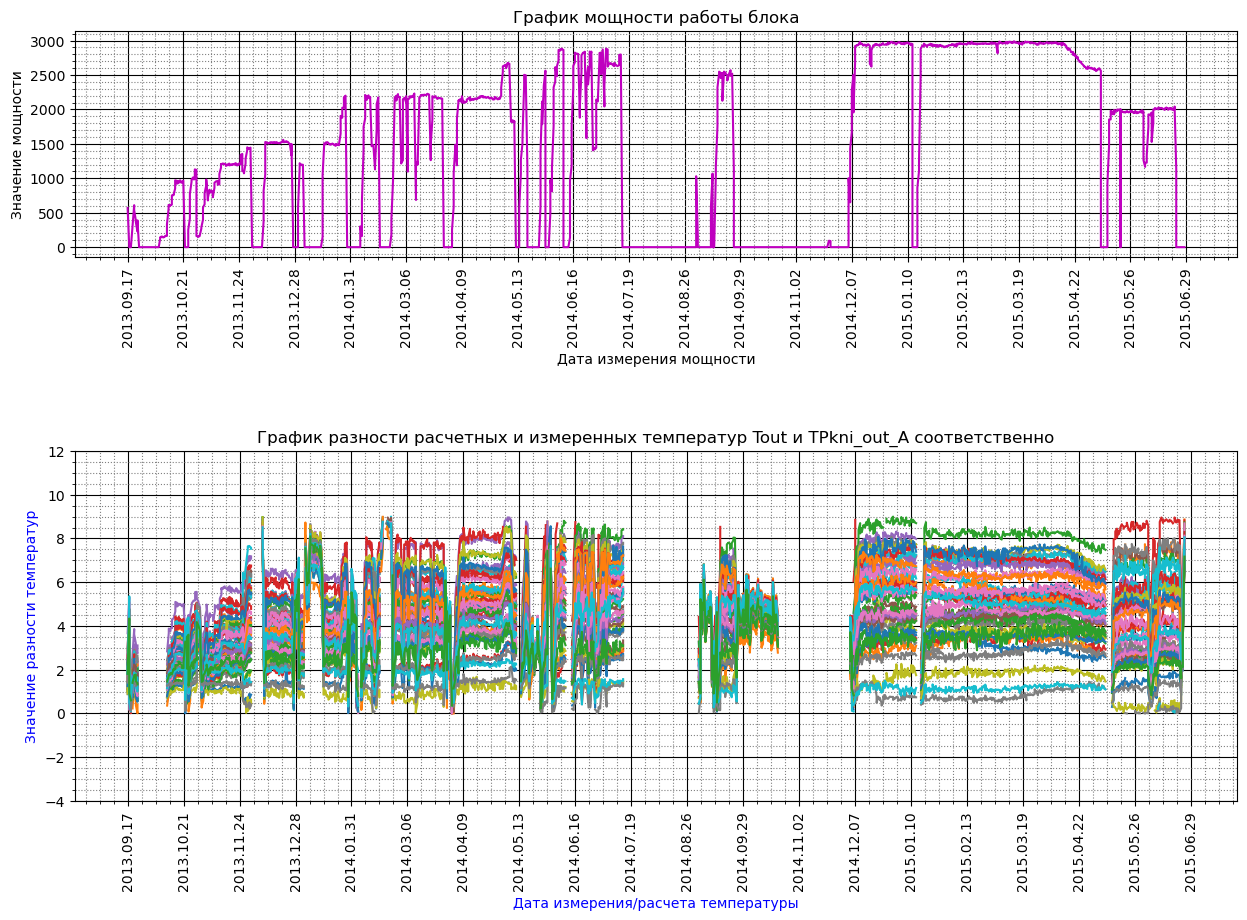

In [14]:
# Вывод графиков мощности и разности температур на одном полотне
filenameTPkni_out_A = 'TPkni_out_A.txt'
NakzAndDef(filenameTPkni_out_A)

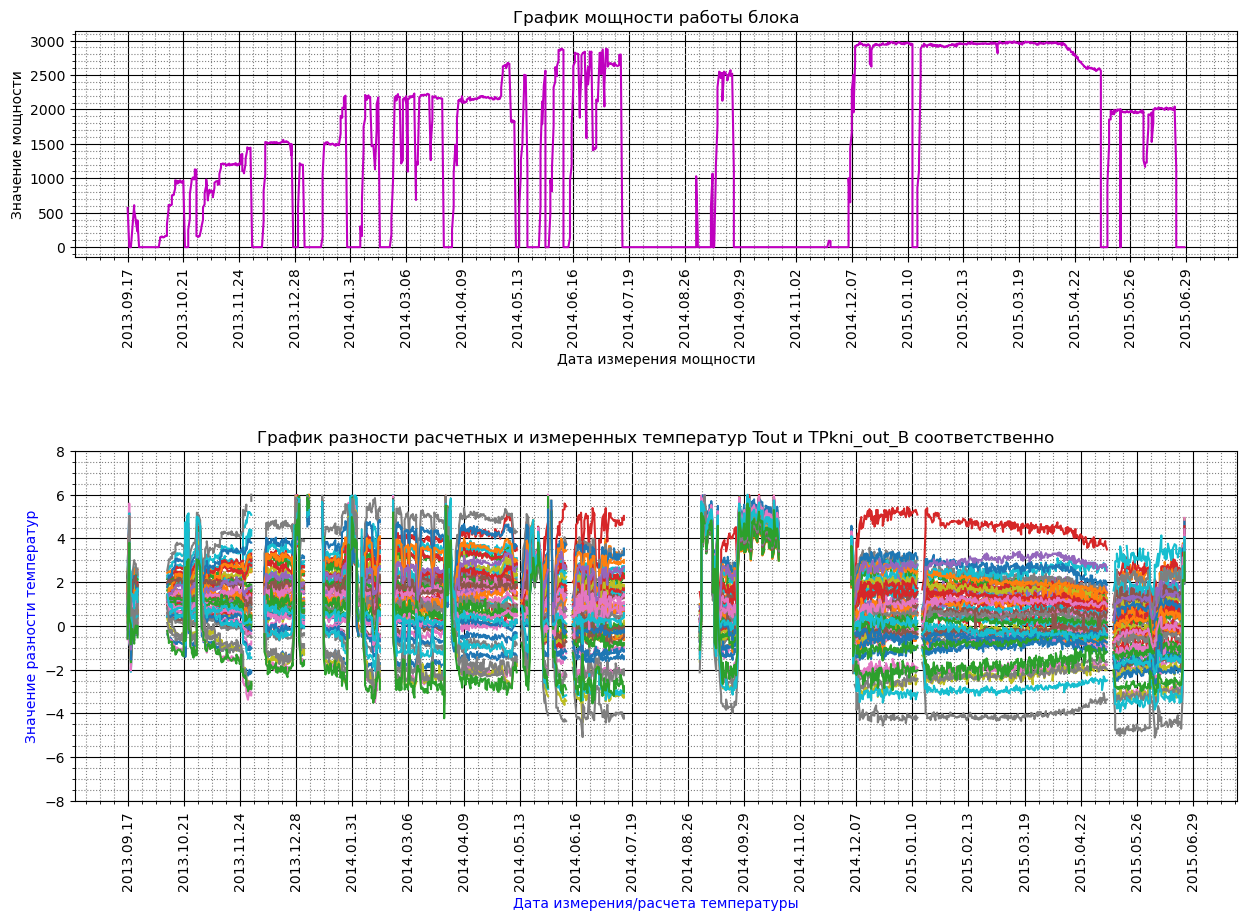

In [15]:
# Вывод графиков мощности и разности температур на одном полотне
filenameTPkni_out_B = 'TPkni_out_B.txt'
NakzAndDef(filenameTPkni_out_B)

In [21]:
##### Функция, реализующая вывод графика разности температур за заданный промежуток времени
def Intervals(Dif_Tout_TPkni_out, name_title, name_xlabel, name_ylabel, top_y_lim, bottom_y_lim, 
              graf_lim_y, NumGraf, GrafChoice, GrafList):
    
    Dif_Tout_TPkni_out = Dif_Tout_TPkni_out.transpose()
    head_names = Dif_Tout_TPkni_out.columns

    # Название читаемого файлов
    filenameTout = 'Tout.txt'
    
    #=======================================#
    # Создание меток дат на оси Х для неформатированного списка дат
    
    #Количество рисок с подписями дат
    xlabels = 20
    LenDateAndTime = len(GetDateAndTime(filenameTout))
    x_ticks = []
    intbuff = round((LenDateAndTime - 1)/(xlabels - 1))

    i = 0 # Итератор
    for i in range(xlabels):
        x_ticks.append(i * intbuff/2)

    # Инициализация списка, используемого для хранения дат соответствующих значениям x_ticks
    XlabelsList = []

    i = 0 # Итератор
    for i in range(xlabels):
        XlabelsList.append(GetDateAndTime(filenameTout)[i * intbuff])
        
    #=======================================#
    # Выбор пользователем временного промежутка
    print('Выберите временной промежуток, в котором хотите посмотреть динамику изменения параметра\n')

    print('Начало временного промежутка:')

    i = 0
    for i in range(len(XlabelsList)):
        print(' [', i + 1, '] ', XlabelsList[i])

    choiceN1 = int(input())

    print('Конец временного промежутка:')

    i = 0
    j = choiceN1 - 1

    while j != len(XlabelsList) - 1:
        print(' [', j + 2, '] ', XlabelsList[j + 1])
        j = j + 1

    choiceN2 = int(input())
    #=======================================#
    # Создание меток дат на оси Х для форматированного списка дат
    
    NewDifDf = pd.DataFrame()

    if choiceN1 != 1:
        for i in range(len(head_names)):
            if head_names[i] == XlabelsList[choiceN1 - 1]:
                StartDate = i
    else:
        StartDate = 0
            
    if choiceN2 != 20:
        for i in range(len(head_names)):
            if head_names[i] == XlabelsList[choiceN2 - 1]:
                EndDate = i
    else:
        EndDate = (len(head_names) - 1)

    newdatelist = []

    for i in range(EndDate - StartDate):
        newdatelist.append(head_names[i + StartDate])

        
    NewDifDf = Dif_Tout_TPkni_out[newdatelist]

    #=======================================#
    # Реализация вывода определенного количества графиков на экран
    NewDifDf = NewDifDf.transpose()

    for i in range(len(NewDifDf.columns)):
        if NewDifDf[i].sum() == float(0):
            del NewDifDf[i]

    NewDifDf = NewDifDf.transpose()
    NewDifDf.reset_index(drop= True , inplace= True )
    NewDifDf = NewDifDf.transpose()
    
    
    
    Len_DF = len(NewDifDf.columns)
    if NumGraf != len(NewDifDf.columns):
        i = NumGraf
        while i != Len_DF:
            del NewDifDf[i]
            i = i + 1
    
    #=======================================#
    # Вывод графиков на экран
    
    fig, ax = plt.subplots(figsize=(10,5))
    
    
    if GrafList == True:
        for i in range(len(GrafChoice)):
            plt.plot(NewDifDf[GrafChoice[i] - 1])
    else:
        for i in range(len(NewDifDf.columns)):
            plt.plot(NewDifDf[i])
        

    plt.ylim(graf_lim_y)

    plt.xlabel('Ось x', fontsize=10, color='blue')
    plt.ylabel('Ось y', fontsize=10, color='blue')

    #Добавляем линии основной сетки:
    ax.grid(which='major', color = 'k')
    #Включаем видимость вспомогательных делений:
    ax.minorticks_on()
    #  Теперь можем отдельно задавать внешний вид вспомогательной сетки:
    ax.grid(which='minor', color = 'gray', linestyle = ':')

    #Количество рисок с подписями дат
    xlabels = 20
    LenDateAndTime = len(newdatelist)
    x_ticks = []
    intbuff = (LenDateAndTime - 1)/(xlabels - 1)

    i = 0 # Итератор
    for i in range(xlabels):
        x_ticks.append(math.floor(i * intbuff/2))

    # Инициализация списка, используемого для хранения дат соответствующих значениям x_ticks
    XlabelsList = []

    i = 0 # Итератор
    for i in range(xlabels):
        XlabelsList.append(newdatelist[math.floor(i * intbuff)])

    plt.xticks(ticks=x_ticks, labels=XlabelsList, rotation=90)

    ax.set_title(name_title)
    ax.set_xlabel(name_xlabel)
    ax.set_ylabel(name_ylabel)
    #=======================================#
    # Вывод легенды на экран
    legends = []
    
    NewDifDf = NewDifDf.transpose()
    
    for i in range(len(NewDifDf[newdatelist[0]])):
        legends.append(i + 1)
        
    
    if GrafList == True:
        plt.legend(GrafChoice,
              fontsize = 10, #  размер шрифта
              shadow = True, #  добавление тени
              ncol = 2,    #  количество столбцов
              facecolor = 'oldlace',    #  цвет области
              edgecolor = 'r',    #  цвет крайней линии
              bbox_to_anchor=(1.05, 1)
             )
    
    else:
        plt.legend(legends,
              fontsize = 10, #  размер шрифта
              shadow = True, #  добавление тени
              ncol = 2,    #  количество столбцов
              facecolor = 'oldlace',    #  цвет области
              edgecolor = 'r',    #  цвет крайней линии
              bbox_to_anchor=(1.05, 1)
             )
    

Выберите временной промежуток, в котором хотите посмотреть динамику изменения параметра

Начало временного промежутка:
 [ 1 ]  2013.09.17
 [ 2 ]  2013.10.21
 [ 3 ]  2013.11.24
 [ 4 ]  2013.12.28
 [ 5 ]  2014.01.31
 [ 6 ]  2014.03.06
 [ 7 ]  2014.04.09
 [ 8 ]  2014.05.13
 [ 9 ]  2014.06.16
 [ 10 ]  2014.07.19
 [ 11 ]  2014.08.26
 [ 12 ]  2014.09.29
 [ 13 ]  2014.11.02
 [ 14 ]  2014.12.07
 [ 15 ]  2015.01.10
 [ 16 ]  2015.02.13
 [ 17 ]  2015.03.19
 [ 18 ]  2015.04.22
 [ 19 ]  2015.05.26
 [ 20 ]  2015.06.29
15
Конец временного промежутка:
 [ 16 ]  2015.02.13
 [ 17 ]  2015.03.19
 [ 18 ]  2015.04.22
 [ 19 ]  2015.05.26
 [ 20 ]  2015.06.29
18


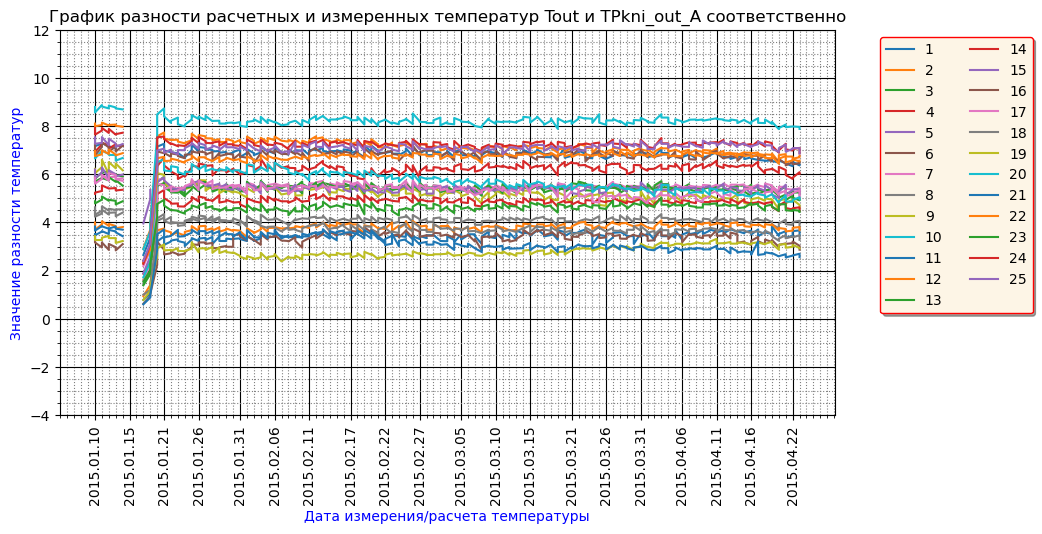

In [22]:
# Названия графика, оси X и оси Y соответственно
title_name = 'График разности расчетных и измеренных температур Tout и TPkni_out_A соответственно'
xlabel_name = 'Дата измерения/расчета температуры'
ylabel_name = 'Значение разности температур'

# Ограничение графика по оси Y сверху и снизу соответственно
y_lim_top = 100
y_lim_bottom = 100

# Ограничение максимального значения области для графиков по оси Y
lim_y_graf = [-4, 12]

# Переменная, отвечающая за вывод определенного количества графиков
# (Максимум 50, т.к. из 163 столбцов значечений разниц температур, лишь они не являются выбросами)
AmountGrafs = 25

# Переменная, отвечающая за вывод определенных графиков
# (Если True - то вывод тех графиков, номера которых записаны в переменной Graf_Selection)
ListGraf = False

# Номера выводимых графиков при ListGraf == True
Graf_Selection = [2, 21]

Intervals(Dif_Tout_TPkni_out_A, title_name, xlabel_name, ylabel_name, y_lim_top, 
          y_lim_bottom, lim_y_graf, AmountGrafs, Graf_Selection, ListGraf)

Выберите временной промежуток, в котором хотите посмотреть динамику изменения параметра

Начало временного промежутка:
 [ 1 ]  2013.09.17
 [ 2 ]  2013.10.21
 [ 3 ]  2013.11.24
 [ 4 ]  2013.12.28
 [ 5 ]  2014.01.31
 [ 6 ]  2014.03.06
 [ 7 ]  2014.04.09
 [ 8 ]  2014.05.13
 [ 9 ]  2014.06.16
 [ 10 ]  2014.07.19
 [ 11 ]  2014.08.26
 [ 12 ]  2014.09.29
 [ 13 ]  2014.11.02
 [ 14 ]  2014.12.07
 [ 15 ]  2015.01.10
 [ 16 ]  2015.02.13
 [ 17 ]  2015.03.19
 [ 18 ]  2015.04.22
 [ 19 ]  2015.05.26
 [ 20 ]  2015.06.29
15
Конец временного промежутка:
 [ 16 ]  2015.02.13
 [ 17 ]  2015.03.19
 [ 18 ]  2015.04.22
 [ 19 ]  2015.05.26
 [ 20 ]  2015.06.29
18


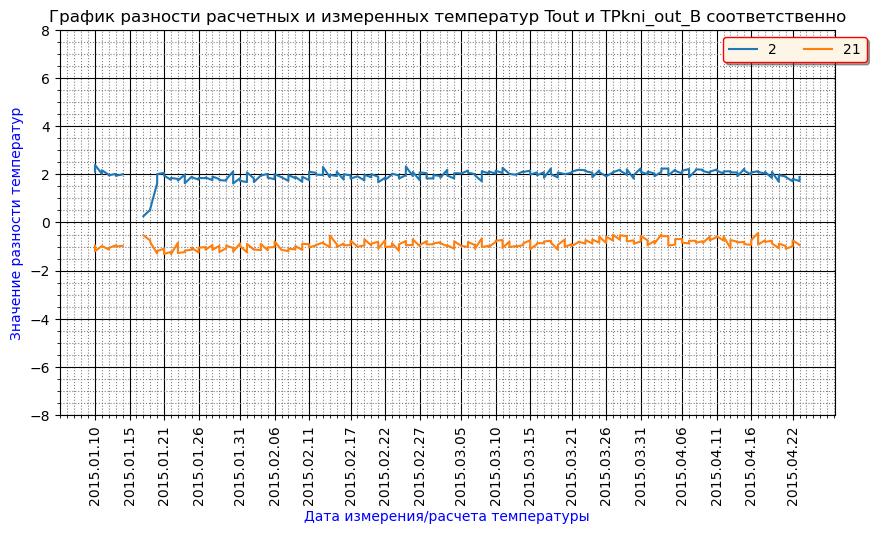

In [19]:
# Названия графика, оси X и оси Y соответственно
title_name = 'График разности расчетных и измеренных температур Tout и TPkni_out_B соответственно'
xlabel_name = 'Дата измерения/расчета температуры'
ylabel_name = 'Значение разности температур'

# Ограничение графика по оси Y сверху и снизу соответственно
y_lim_top = 100
y_lim_bottom = 100

# Ограничение максимального значения области для графиков по оси Y
lim_y_graf = [-8, 8]

# Переменная, отвечающая за вывод определенного количества графиков
# (Максимум 50, т.к. из 163 столбцов значечений разниц температур, лишь они не являются выбросами)
AmountGrafs = 25

# Переменная, отвечающая за вывод определенных графиков
# (Если True - то вывод тех графиков, номера которых записаны в переменной Graf_Selection)
ListGraf = True

# Номера выводимых графиков при ListGraf == True
Graf_Selection = [2, 21]

Intervals(Dif_Tout_TPkni_out_B, title_name, xlabel_name, ylabel_name, y_lim_top, 
          y_lim_bottom, lim_y_graf, AmountGrafs, Graf_Selection, ListGraf)